### Описание проекта

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В
свободное время жители городов больше не выходят на улицу, не посещают кафе
и торговые центры. Зато стало больше времени для книг. Это заметили
стартаперы — и бросились создавать приложения для тех, кто любит читать.
Ваша компания решила быть на волне и купила крупный сервис для чтения книг
по подписке. Ваша первая задача как аналитика — проанализировать базу
данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские
обзоры книг. Эти данные помогут сформулировать ценностное предложение для
нового продукта.

**Описание данных**


**Таблица `books`**

Содержит данные о книгах:
* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:
* `author_id` — идентификатор автора;
* `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:
* `publisher_id` — идентификатор издательства;
* `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:
* `rating_id` — идентификатор оценки;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, оставившего оценку;
* `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:
* `review_id` — идентификатор обзора;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, написавшего обзор;
* `text` — текст обзора.

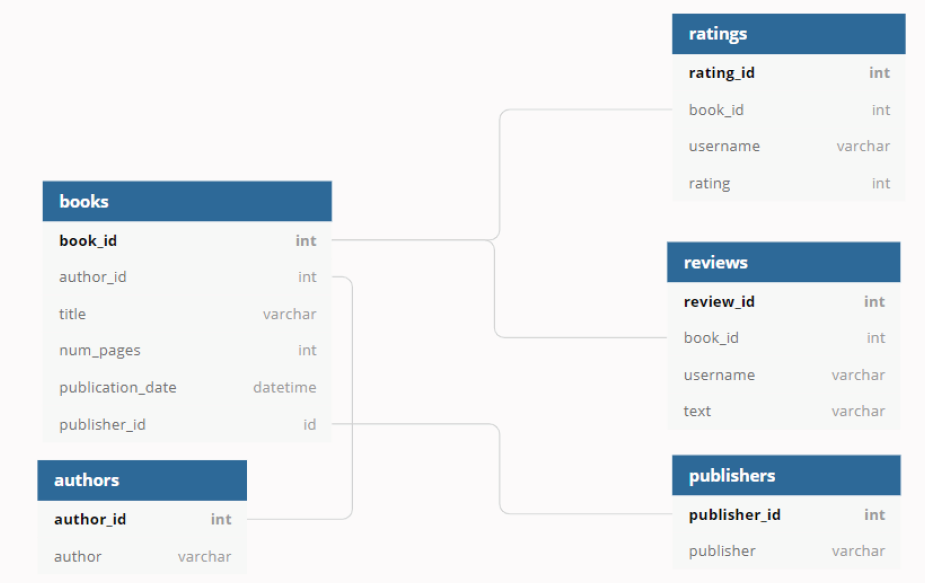

### Задания
1. Посчитайте, сколько книг вышло после 1 января 2000 года;
2. Для каждой книги посчитайте количество обзоров и среднюю оценку;
3. Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
4. Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
5. Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
            db_config['pwd'],
            db_config['host'],
            db_config['port'],
            db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {};'''.format(table) 

    request = pd.io.sql.read_sql(query, con = engine)
    print(table)
    display(request.head(3))

books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135


authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie


publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books


ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5


reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...


Для проверки результатов исполнения задания на питоне создадим переменные и вложим в них значения таблиц

In [4]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)

requested_books = ''' SELECT * FROM books; ''' 
books = pd.io.sql.read_sql(requested_books, con = engine)

requested_authors = ''' SELECT * FROM authors; ''' 
authors = pd.io.sql.read_sql(requested_authors, con = engine)

requested_publishers = ''' SELECT * FROM publishers; ''' 
publishers = pd.io.sql.read_sql(requested_publishers, con = engine)

requested_ratings = ''' SELECT * FROM ratings; ''' 
ratings = pd.io.sql.read_sql(requested_ratings, con = engine)

requested_reviews = ''' SELECT * FROM reviews; ''' 
reviews = pd.io.sql.read_sql(requested_reviews, con = engine)

## Посчитайте, сколько книг вышло после 1 января 2000 года


### sql

In [5]:
query_ = \
''' 
SELECT COUNT(*) 
FROM books 
WHERE publication_date > '2000-01-01';
''' 

request_ = pd.io.sql.read_sql(query_, con = engine)


print(f'Начиная с 1-го января 2000 года выпущено {request_.iloc[0,0]} книг')



Начиная с 1-го января 2000 года выпущено 819 книг


### python

In [6]:
books.publication_date = pd.to_datetime(books.publication_date, format="%Y-%m-%d")
books.query('publication_date > "2000-01-01"').title.count()

819

## Для каждой книги посчитайте количество обзоров и среднюю оценку

### sql

In [7]:
query_ = \
''' 
SELECT 
    books.title AS title,
    reviews_.quantity_rev AS sum_of_ratings,
    ratings_.avg_rat AS mean_of_ratings
FROM books
    LEFT JOIN (SELECT book_id, AVG(rating) AS avg_rat
    FROM ratings
    GROUP BY book_id
    ) AS ratings_ ON ratings_.book_id = books.book_id
    LEFT JOIN (SELECT book_id, COUNT(review_id) AS quantity_rev
    FROM reviews
    GROUP BY book_id
    ) AS reviews_ ON reviews_.book_id = books.book_id
    ORDER BY title
; ''' 


request_ = pd.io.sql.read_sql(query_, con = engine)
request_.head()

,title,sum_of_ratings,mean_of_ratings
0,'Salem's Lot,2.0,3.666667
1,1 000 Places to See Before You Die,1.0,2.500000
2,13 Little Blue Envelopes (Little Blue Envelope...,3.0,4.666667
3,1491: New Revelations of the Americas Before C...,2.0,4.500000
4,1776,4.0,4.000000


### python

In [8]:
means = ratings.groupby('book_id', as_index=False).rating.mean()
summs = reviews.groupby('book_id', as_index=False).text.count()
books.merge(means, on='book_id', how='inner') \
    .merge(summs, on='book_id', how='inner')[['title','text','rating']] \
    .rename(columns = {'text':'sum_of_ratings', 'rating':'mean_of_ratings'}) \
    .sort_values('title') \
    .head() 

,title,sum_of_ratings,mean_of_ratings
0,'Salem's Lot,2,3.666667
1,1 000 Places to See Before You Die,1,2.500000
2,13 Little Blue Envelopes (Little Blue Envelope...,3,4.666667
3,1491: New Revelations of the Americas Before C...,2,4.500000
4,1776,4,4.000000


In [9]:
reviews_and_mean_mark = books.merge(ratings, on=['book_id'], how='inner') \
    .merge(reviews, on=['book_id'], how='inner') \
    .groupby(['title'], as_index=False) \
    .agg({'rating_id':'count','rating':'mean'}) \
    .sort_values('title') \
    .head()

reviews_and_mean_mark

,title,rating_id,rating
0,'Salem's Lot,6,3.666667
1,1 000 Places to See Before You Die,2,2.500000
2,13 Little Blue Envelopes (Little Blue Envelope...,9,4.666667
3,1491: New Revelations of the Americas Before C...,4,4.500000
4,1776,24,4.000000


## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры


### sql

In [10]:
query_ = \
''' 
SELECT
    p.publisher,
    COUNT(b.book_id)
FROM books b
JOIN publishers p ON b.publisher_id=p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id
ORDER BY count DESC
limit(1)
'''


request_ = pd.io.sql.read_sql(query_, con = engine)
request_.head(20)

,publisher,count
0,Penguin Books,42


### python

In [11]:
publisher_book = books.merge(publishers, on='publisher_id', how='inner') \
    .query('num_pages > 50') \
    .pivot_table(columns='publisher', values='title', aggfunc='count').T \
    .sort_values('title', ascending=False) \
    .reset_index() \
    .head(1)

publisher_book

,publisher,title
0,Penguin Books,42


## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

### sql

In [12]:
query_ = \
''' 
SELECT a.author, b.title, avg(r.rating)
FROM books b
JOIN authors a ON b.author_id=a.author_id
JOIN ratings r ON b.book_id=r.book_id
GROUP BY b.book_id, a.author
HAVING COUNT(r.book_id) > 50
ORDER BY AVG(r.rating) DESC
LIMIT(1)
'''


request_ = pd.io.sql.read_sql(query_, con = engine)
request_

,author,title,avg
0,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634


### python

In [13]:
author = authors.merge(books, on='author_id', how='inner').merge(ratings, on='book_id', how='inner') \
    .groupby(['author', 'title'], as_index=False).agg({'rating_id':'count','rating':'mean'}) \
    .rename(columns = {'rating_id':'sum_of_marks', 'rating':'mean_rating'}) \
    .query('sum_of_marks >= 50') \
    .sort_values('mean_rating', ascending=False) \
    .head(1)  \
#     .loc[:,'author']

author

,author,title,sum_of_marks,mean_rating
352,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harr...,82,4.414634


## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

### sql

In [14]:
query_ = \
''' 
SELECT AVG(review_summs.reviews_count)
FROM (
    SELECT COUNT(review_id) AS reviews_count
    FROM reviews
    WHERE username IN
        (SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 50
        )
    GROUP BY username
    ) AS review_summs
;
''' 

request_ = pd.io.sql.read_sql(query_, con = engine)
request_

,avg
0,24.333333


### python

In [14]:
user_list = ratings.groupby('username', as_index=False).rating_id.count() \
    .query('rating_id > 50') \
    .username.to_list()               # список пользователей с кол-вом оценок, больше 50

user_review_50_mean = reviews.query('username in @user_list') \
    .groupby('username', as_index=False).text.count() \
    .text.mean()

user_review_50_mean

24.333333333333332